# Lending Club Case Study

## *Importing necessary libraries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes
import seaborn as sns

C:\Users\shwet\AppData\Local\Temp\ipykernel_24344\2663493134.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## *Data Sourcing*

In [2]:
loan_data = pd.read_csv('loan.csv',low_memory=False)

## *Data Visualization*

#### Checking first 5 rows of the data

In [3]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### Checking the shape of the data

In [4]:
loan_data.shape

(39717, 111)

#### Checking the columns

In [5]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

#### Describing the columns

In [6]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


#### Checking the info of the data

In [7]:
loan_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

## *Data Cleaning*

### *Delete Columns*

#### Where all values are null

In [8]:
loan_data.dropna(axis = 1, how = 'all', inplace = True)

#### Checking distinct count for each column

In [9]:
loan_data.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26526
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

#### Delete unnecessary columns <font size=2>(Which we will not use for analysis)</font>

In [10]:
irrelevant_columns = ["id","member_id","desc","url","zip_code","emp_title","title","last_pymnt_d"]
loan_data.drop(irrelevant_columns,axis=1,inplace=True)

#### For columns having distinct count = 1 <font size=2>(As they are not useful in analysis)</font>

In [11]:
single_valued_columns = ["pymnt_plan","initial_list_status","collections_12_mths_ex_med","policy_code","application_type","acc_now_delinq","chargeoff_within_12_mths","delinq_amnt","tax_liens"]
loan_data.drop(single_valued_columns,axis=1,inplace=True)

#### Checking percentage of missing values in each column

In [12]:
round(100*loan_data.isnull().mean(),2)

loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
term                        0.00
int_rate                    0.00
installment                 0.00
grade                       0.00
sub_grade                   0.00
emp_length                  2.71
home_ownership              0.00
annual_inc                  0.00
verification_status         0.00
issue_d                     0.00
loan_status                 0.00
purpose                     0.00
addr_state                  0.00
dti                         0.00
delinq_2yrs                 0.00
earliest_cr_line            0.00
inq_last_6mths              0.00
mths_since_last_delinq     64.66
mths_since_last_record     92.99
open_acc                    0.00
pub_rec                     0.00
revol_bal                   0.00
revol_util                  0.13
total_acc                   0.00
out_prncp                   0.00
out_prncp_inv               0.00
total_pymnt                 0.00
total_pymn

#### For columns having more than 60% missing values

In [13]:
more_than_60_percent_missing_values = ["next_pymnt_d","mths_since_last_record","mths_since_last_delinq"]
loan_data.drop(more_than_60_percent_missing_values,axis=1,inplace=True)

### *Fix Data Type*

#### Converting term to int dtype w.r.t months

In [14]:
loan_data['term_in_months'] = loan_data['term'].apply(lambda x: x.replace(' months', '')).astype('Int64')
loan_data.drop('term',axis = 1, inplace = True )

#### Converting int_rate to float dtype w.r.t percentage

In [15]:
loan_data['interest_percentage'] = loan_data['int_rate'].str.replace('%', '').astype('Float64')
loan_data.drop('int_rate', axis=1, inplace=True)

#### Converting revol_util to float dtype w.r.t percentage

In [16]:
loan_data['revol_util'] = loan_data['revol_util'].str.replace('%', '').astype('Float64')

#### Converting issue_d to datetime format <font size=2>[issue_d is in the format of mmm-yy e.g. Mar-11]</font>

In [17]:
loan_data['issue_d']=pd.to_datetime(loan_data['issue_d'],format='%b-%y')

#### Deriving Year & Month segments from issue_d 

In [18]:
loan_data['issue_year'] = loan_data['issue_d'].dt.year
loan_data['issue_month'] = loan_data['issue_d'].dt.month

### *Fix Missing Values*

#### Checking data where emp_length is missing

In [19]:
loan_data[loan_data['emp_length'].isnull()]['loan_status'].value_counts()

loan_status
Fully Paid     805
Charged Off    228
Current         42
Name: count, dtype: int64

#### Imputing NaN data with 'NA' for emp_length
These records have loan_status = Charged Off hence we are imputing these by replacing NaN with 'NA' instead of dropping the rows considering these datas are not provided by borrower or probably the case where borrower is unemplyed 

In [20]:
loan_data['emp_length'] = loan_data['emp_length'].fillna('NA')

#### Checking data where revol_util is missing

In [21]:
loan_data['revol_util'].isnull().sum()

50

#### Imputing NaN data with Median for revol_util

In [22]:
revol_util_median = loan_data['revol_util'].median()
loan_data['revol_util'] = loan_data['revol_util'].fillna(revol_util_median)

#### Checking data where last_credit_pull_d is missing

In [23]:
loan_data['last_credit_pull_d'].isnull().value_counts()

last_credit_pull_d
False    39715
True         2
Name: count, dtype: int64

#### Removing rows where last_credit_pull_d is NaN
###### As there are only 2 records for that

In [24]:
loan_data = loan_data[~loan_data['last_credit_pull_d'].isnull()]

#### Checking data where pub_rec_bankruptcies is missing

In [25]:
loan_data[loan_data['pub_rec_bankruptcies'].isnull()]['loan_status'].value_counts()

loan_status
Fully Paid     578
Charged Off    118
Name: count, dtype: int64

In [26]:
loan_data['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    37338
1.0     1674
2.0        7
Name: count, dtype: int64

In [27]:
loan_data[loan_data['pub_rec_bankruptcies'].isnull()]['delinq_2yrs'].value_counts()

delinq_2yrs
0    599
1     69
2     18
3      8
4      2
Name: count, dtype: int64

#### Imputing the NaN values with Median for pub_rec_bankruptcies

In [28]:
bankruptcies_median = loan_data['pub_rec_bankruptcies'].median()
loan_data['pub_rec_bankruptcies'] = loan_data['pub_rec_bankruptcies'].fillna(bankruptcies_median)

#### Check for if any missing values present

In [29]:
loan_data.isna().any()

loan_amnt                  False
funded_amnt                False
funded_amnt_inv            False
installment                False
grade                      False
sub_grade                  False
emp_length                 False
home_ownership             False
annual_inc                 False
verification_status        False
issue_d                    False
loan_status                False
purpose                    False
addr_state                 False
dti                        False
delinq_2yrs                False
earliest_cr_line           False
inq_last_6mths             False
open_acc                   False
pub_rec                    False
revol_bal                  False
revol_util                 False
total_acc                  False
out_prncp                  False
out_prncp_inv              False
total_pymnt                False
total_pymnt_inv            False
total_rec_prncp            False
total_rec_int              False
total_rec_late_fee         False
recoveries

### *Removing Outliers*

#### Plotting box plot for annual income

<Axes: ylabel='annual_inc'>

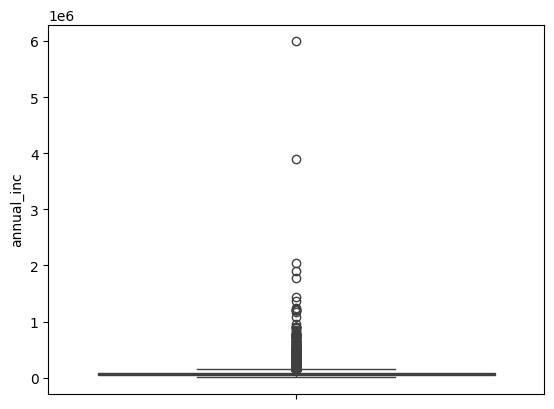

In [30]:
sns.boxplot(y=loan_data['annual_inc'])

#### Removing above 90 percentile data for annual income

<Axes: ylabel='annual_inc'>

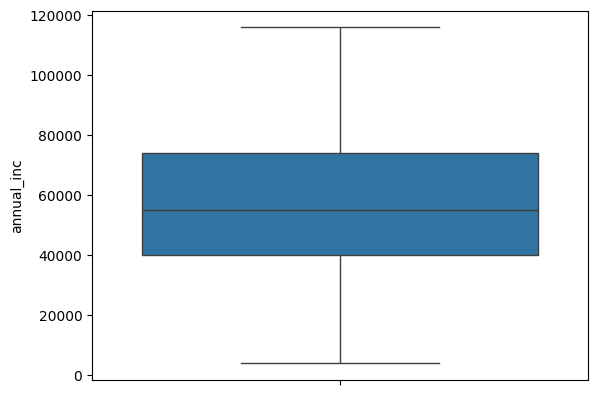

In [31]:
loan_data = loan_data[loan_data['annual_inc']<np.percentile(loan_data['annual_inc'],90)]
sns.boxplot(y=loan_data['annual_inc'])

## *Data Analysis*

### Univariate Analysis : loan_status
We are analysing this column as it represents the Current status of the loan


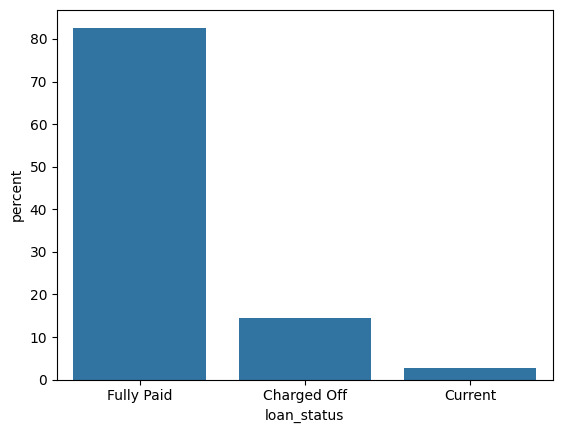

In [32]:
sns.countplot(x = loan_data['loan_status'],stat='percent')
plt.show()

##### **Observation:** Among all the loan records it can be observed that around 80% of the loans are Fully Paid & 15% are Charged Off

### Univariate Analysis : delinq_2yrs
We are analysing this column as it represents the number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years


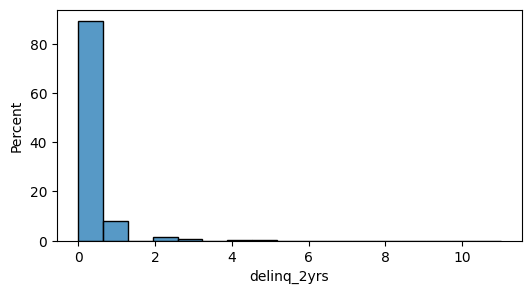

In [33]:
plt.figure(figsize=(6,3))
sns.histplot(data=loan_data['delinq_2yrs'],stat='percent')
plt.show()

##### **Observation:** Among all the loan records it can be observed that around 80% of the loans payments are not getting delayed

### Univariate Analysis : loan_amnt & funded_amnt
We are analysing these columns as they represents the amount of the loan applied for by the borrower & the amount committed to that loan at that point in time respectively

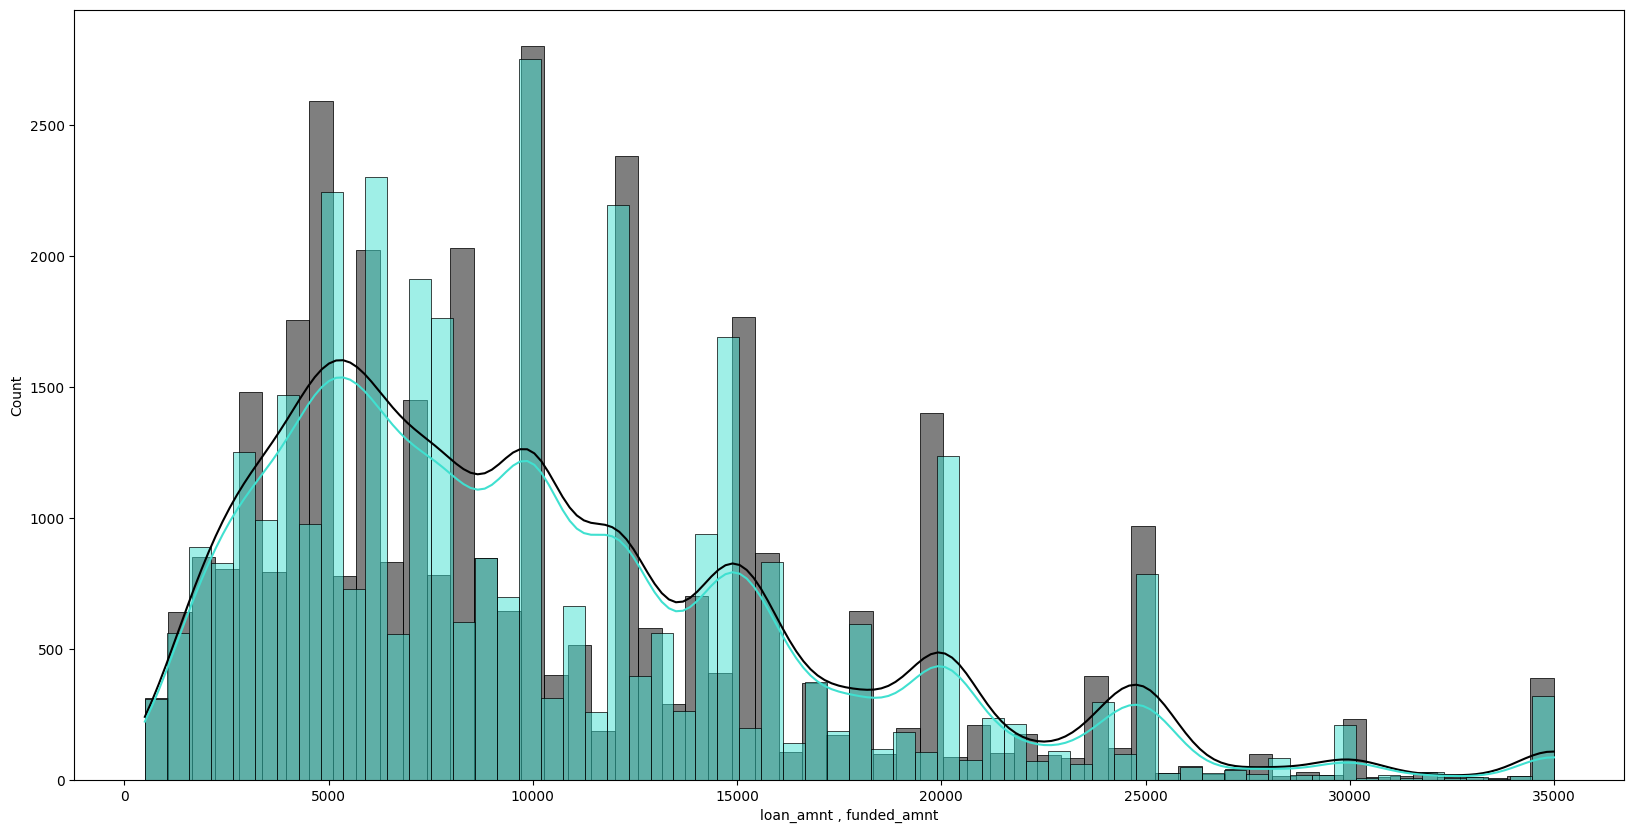

In [34]:
sns.histplot(x=loan_data['loan_amnt'],kde=True,color='black')
sns.histplot(x=loan_data['funded_amnt'],kde=True,color='turquoise')
plt.gcf().set_size_inches(20, 10)
plt.xlabel('loan_amnt , funded_amnt')
plt.show()

##### **Observation:** It is observed that most number of loans are requested and funded are for the amount in range of 5000-15000.
##### Also, the patterns for both loan_amnt & funded_amnt are similar but the funded amount is slightly lower than the loan amount

### Bivariate Analysis : funded_amnt & loan_status
We are analysing any relation of loan status with the funded amount 

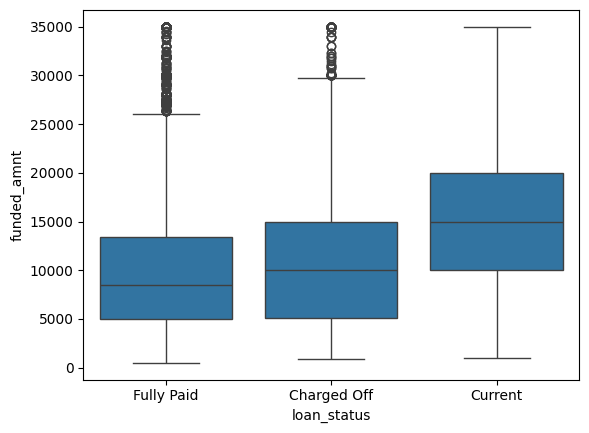

In [35]:
sns.boxplot(data=loan_data, x='loan_status', y='funded_amnt')
plt.show()

##### **Observation:** It can be observed that the median value of funded amount lies higher for Charged Off loans w.r.t the Fully Paid loans

### Univariate Analysis : emp_length
We are analysing this column as it represents the number of years of employment of the borrower

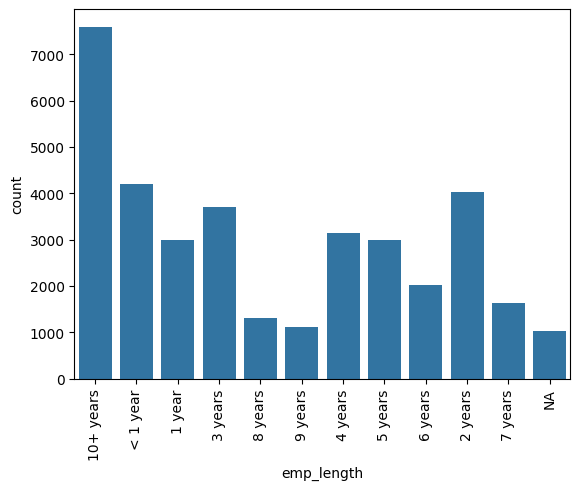

In [36]:
graph = sns.countplot(x=loan_data['emp_length'])
plt.setp(graph.get_xticklabels(), rotation=90)
plt.show()

##### **Observation:** It is observed that most number of loans are applied by the borrowers who are working for more than 10 years

### Segmented Univariate Analysis : emp_length & loan_status
We are trying to analyse if the current status of loan is related to employment length

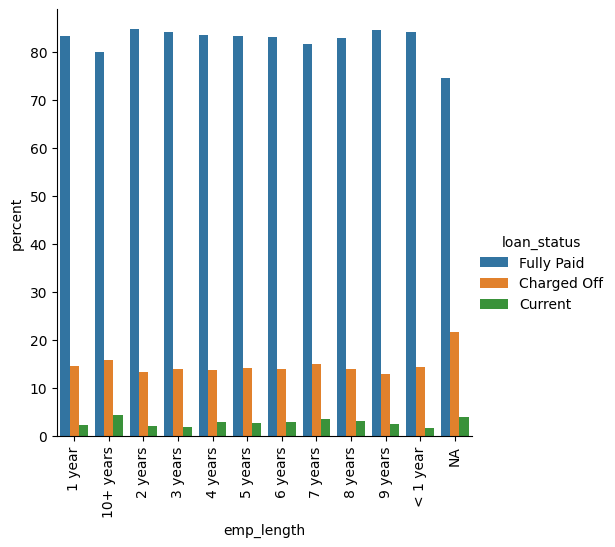

In [37]:
graph = loan_data.groupby('emp_length')['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x='emp_length',y='percent',hue='loan_status',kind='bar')
for ax in graph.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=90)

##### **Observation:** It is observed that the borrowers who didn't provide employment details (probably unemployed) are having higher chances of Charged Off loans

### Univariate Analysis : verification_status
We are analysing this column as it represents the verification status of borrower's income

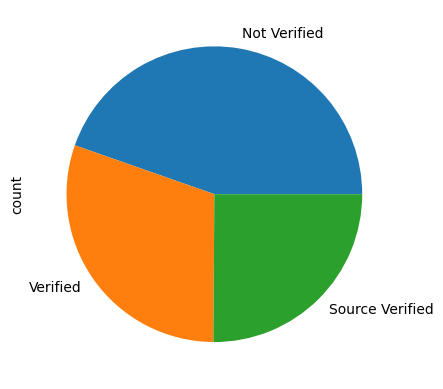

In [38]:
loan_data['verification_status'].value_counts().plot.pie()
plt.show()

##### **Observation:** It is observed that in most of the cases the annual income of the borrower is not verified

### Segmented Univariate Analysis : verification_status & loan_status
We are trying to analyse if the current status of loan is related to verification status

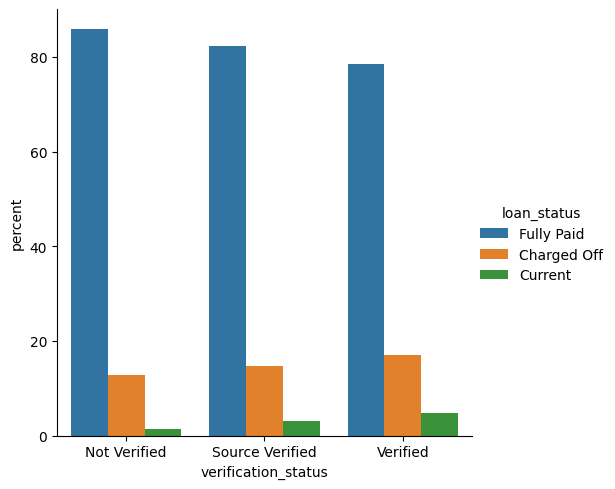

In [39]:
loan_data.groupby('verification_status')['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x='verification_status',y='percent',hue='loan_status',kind='bar')

##### **Observation:** We didn't observe any useful relation between the current status of loan and verification status

### Bivariate Analysis : verification_status & delinq_2yrs
We are trying to analyse if the late payment is related to verification status

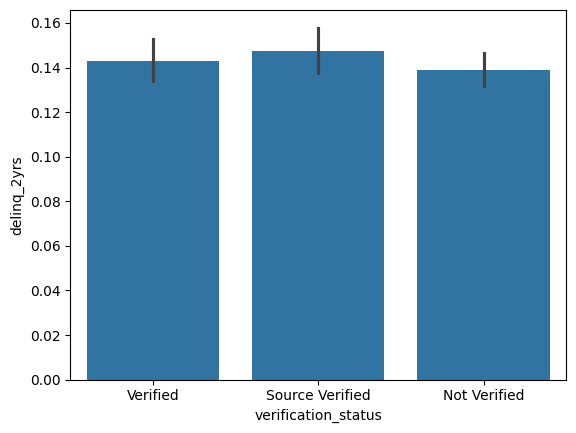

In [40]:
sns.barplot(data=loan_data, x="verification_status", y="delinq_2yrs", estimator="mean")
plt.show()

<Axes: xlabel='verification_status', ylabel='delinq_2yrs'>

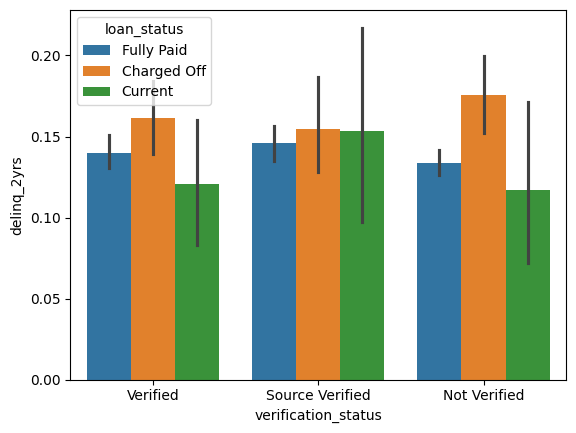

In [41]:
sns.barplot(data=loan_data,x='verification_status',y='delinq_2yrs',hue='loan_status',estimator="mean")

##### **Observation:** It is observed that there is no useful relation between late payments and verification status but the number of Charged Off loans are slightly higher when the delayed monthly payments are considered

### Bivariate Analysis : loan_status & delinq_2yrs
We are trying to analyse if the current status of loan is related to late payments

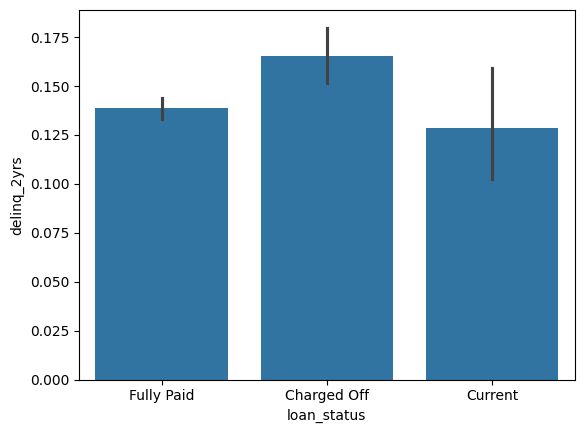

In [42]:
sns.barplot(data=loan_data, x="loan_status", y="delinq_2yrs", estimator=np.mean)
plt.show()

##### **Observation:** It is observed that if the number of late payments in the past 2 years are high, then there is high chance of the loan being Charged Off

### Bivariate Analysis : loan_status & pub_rec_bankruptcies
We are trying to analyse if the current status of loan is related to number of bankruptcies

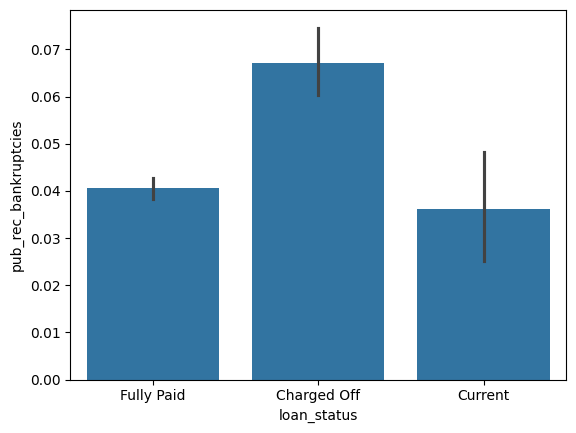

In [43]:
sns.barplot(data=loan_data, x="loan_status", y="pub_rec_bankruptcies", estimator=np.mean)
plt.show()

##### **Observation:** It is observed that high number of bankrupties are leading to the high number of chances of the loan being Charged Off

### Segmented Univariate Analysis : loan_status & grade
We are trying to analyse if the current status of loan is related to grade

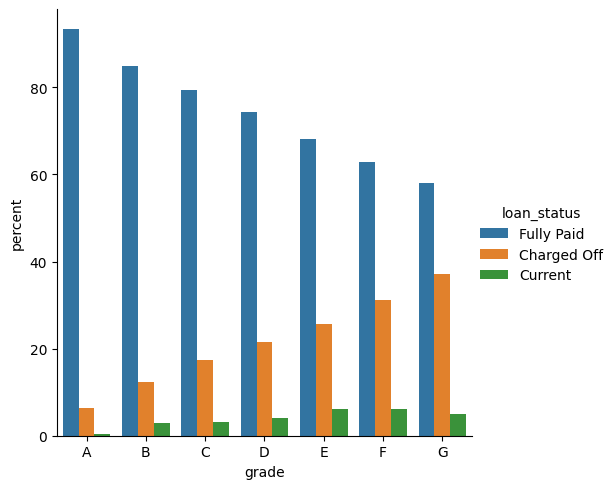

In [44]:
loan_data.groupby('grade')['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x='grade',y='percent',hue='loan_status',kind='bar')

##### **Observation:** It is observed that with higher grade, the percentage of Charged Off loans are also higher

### Bivariate Analysis : grade & delinq_2yrs
We are trying to analyse if late payments are related to loan grade

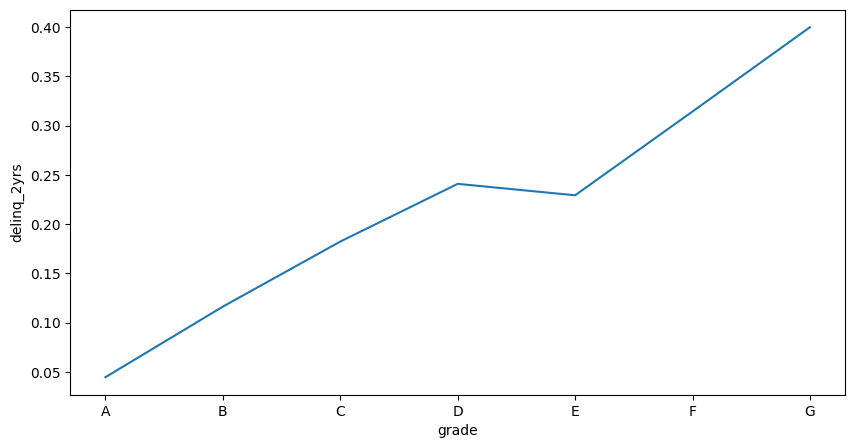

In [45]:
plt.figure(figsize=[10,5])
loan_data.groupby(['grade'])['delinq_2yrs'].mean().plot()
plt.ylabel('delinq_2yrs')
plt.show()

##### **Observation:** It is observed that for higher the grade, the number of late payments are also higher

### Bivariate Analysis : grade & interest_percentage
We are trying to analyse the relation of loan grade & interest percentage

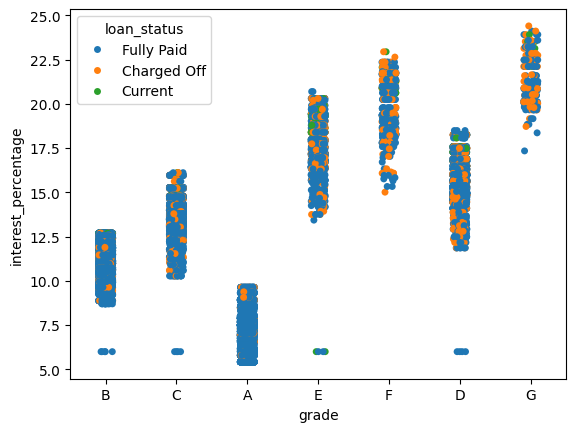

In [46]:
sns.stripplot(loan_data, x='grade', y='interest_percentage',hue='loan_status')
plt.show()

##### **Observation:** It is observed that for interest percentage is high for the higher grades
##### It can also be observed that the large cluster of Charged Off loans are present for high interest percentage and high grade

### Bivariate Analysis : loan_status & revol_util
We are trying to analyse if the current status of loan is related to Revolving line utilization rate

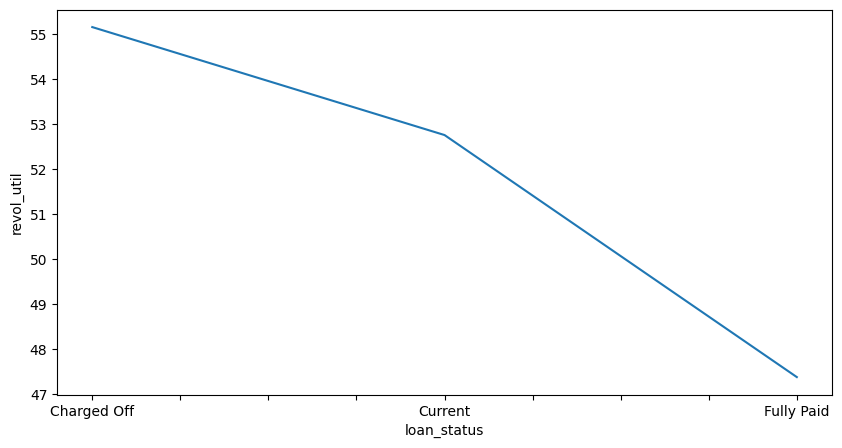

In [47]:
plt.figure(figsize=[10,5])
loan_data.groupby(['loan_status'])['revol_util'].mean().plot()
plt.ylabel('revol_util')
plt.show()

##### **Observation:** It is observed that when the revolving line utilization rate is higher, the number of Charged Off loans are more

### Bivariate Analysis : total_rec_late_fee & revol_util
We are trying to analyse if the total late fees received is related to Revolving line utilization rate

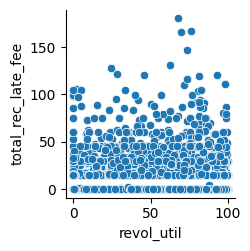

In [48]:
sns.pairplot(
    loan_data,
    x_vars=["revol_util"],
    y_vars=["total_rec_late_fee"],
)
plt.show()

##### **Observation:** It is observed that for higher Revolving line utilization rate, the total amount of late fees is higher

### Univariate Analysis : term_in_months
We are analysing this column as it represents the number of payments on the loan in months

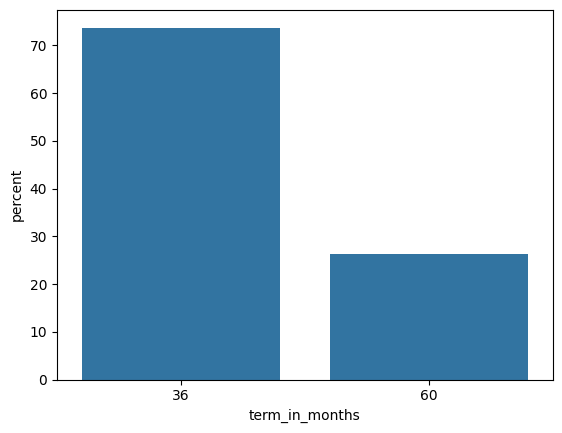

In [49]:
sns.countplot(x=loan_data['term_in_months'],stat='percent')
plt.show()

##### **Observation:** There are only two terms i.e. 36 months and 60 months & Most of the loans(70%) are sanctioned for 36 months

### Segmented Univariate Analysis : loan_status & term_in_months
We are trying to analyse if the current status of loan has any relation with term

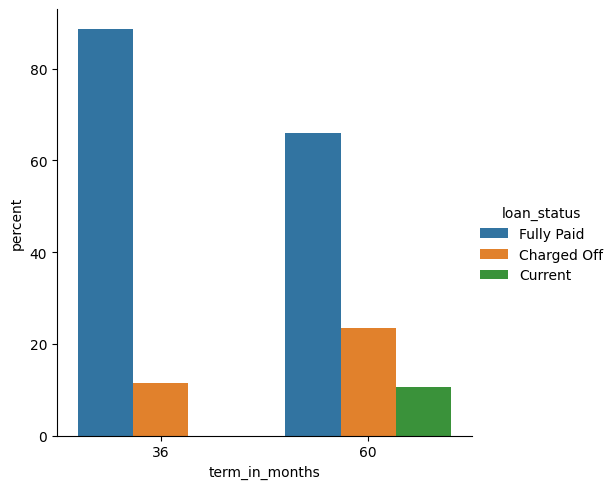

In [50]:
loan_data.groupby('term_in_months')['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x='term_in_months',y='percent',hue='loan_status',kind='bar')

##### **Observation:** Most number of Charged Off loans are of 60 months term

### Univariate Analysis : issue_year
We are trying to analyse the year when the loan is issued 

<Axes: xlabel='issue_year', ylabel='count'>

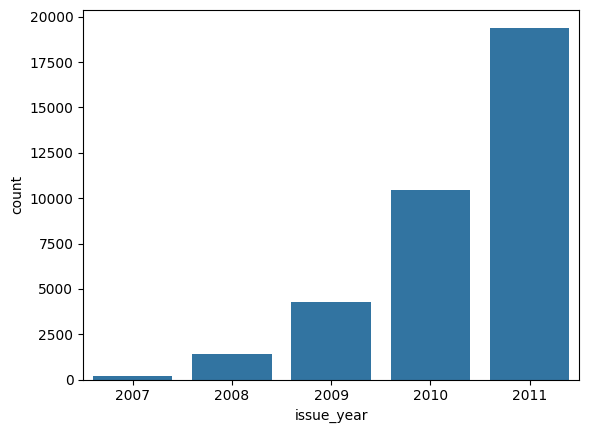

In [51]:
sns.countplot(x=loan_data['issue_year'])

##### **Observation:** Most number of loans issued in the year of 2011

### Bivariate Analysis : issue_year & delinq_2yrs 
We are trying to analyse if the year of issued loan is related to late payments count

<Axes: xlabel='issue_year', ylabel='delinq_2yrs'>

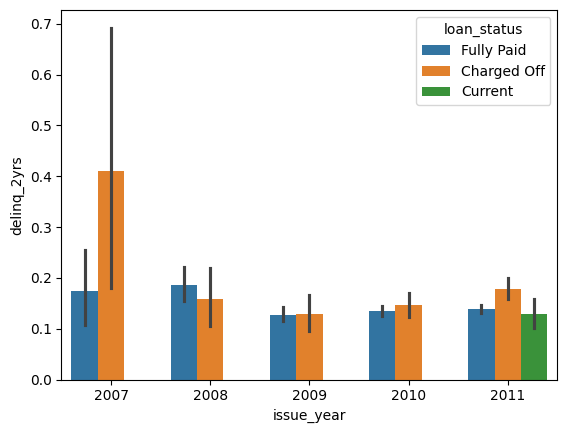

In [52]:
sns.barplot(data=loan_data,x='issue_year',y='delinq_2yrs',hue='loan_status',estimator="mean")

##### **Observation:** It is observed that most number of monthly payment delays as well as Charged Off loans are there in the year 2007

### Univariate Analysis : issue_month
We are trying to analyse the month where the loan is issued

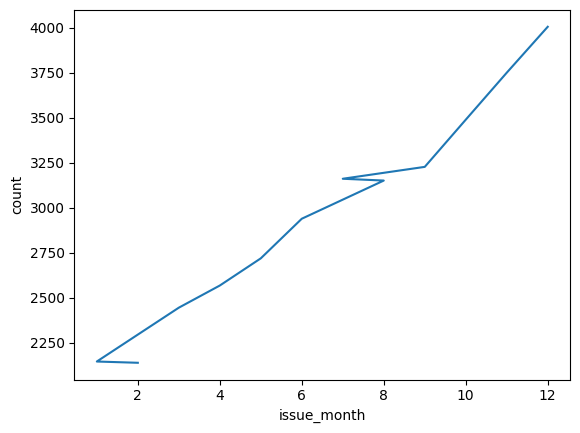

In [53]:
loan_data['issue_month'].value_counts().plot(kind='line')
plt.ylabel('count')
plt.show()

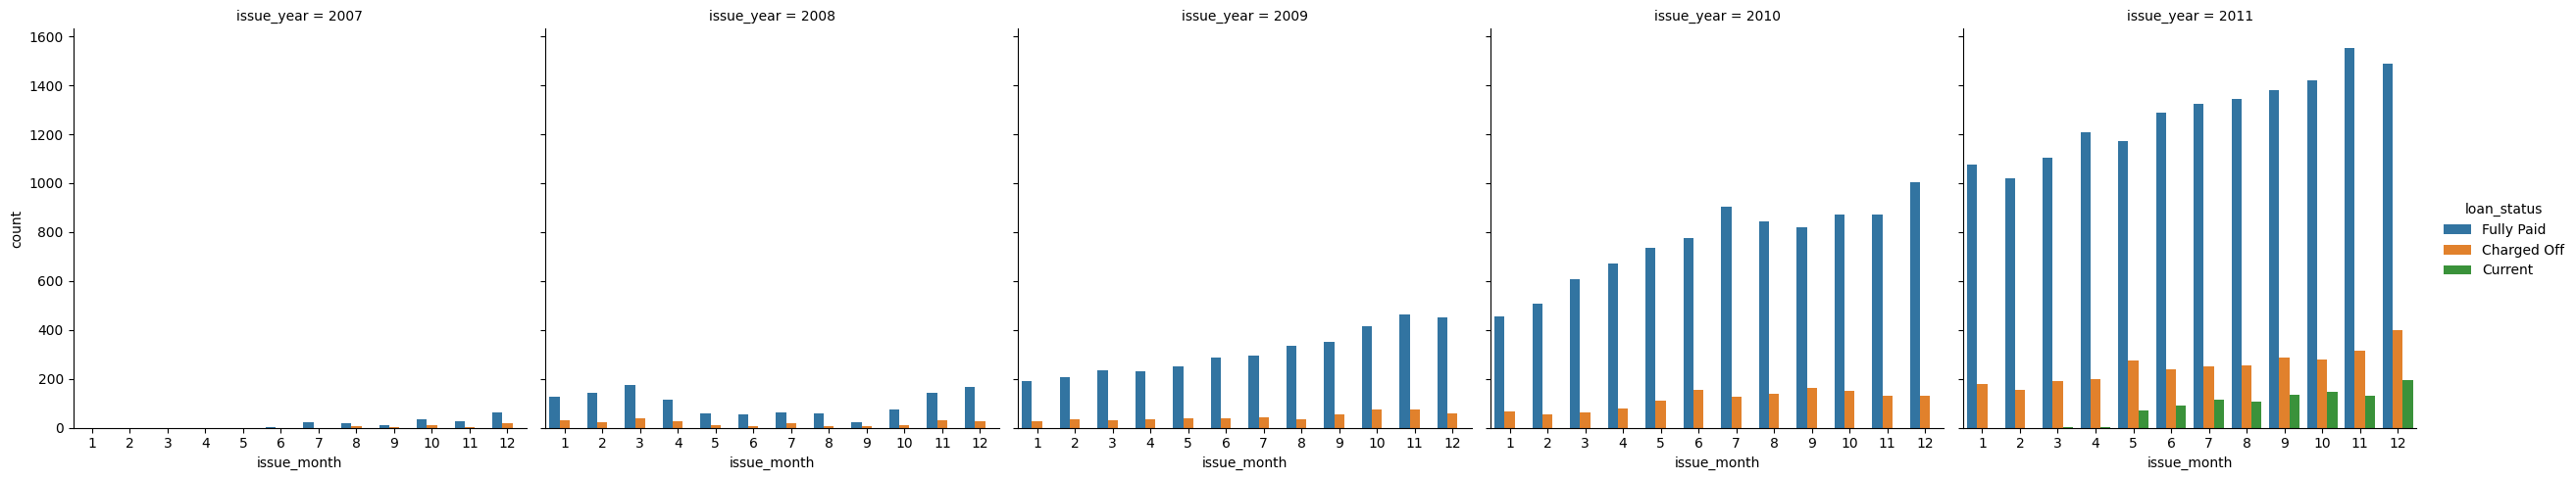

In [54]:
loan_data.groupby('issue_month')[['loan_status','issue_year']].value_counts().rename('count').reset_index().pipe((sns.catplot,'data'), x='issue_month',y='count',col='issue_year',hue='loan_status',kind='bar')

##### **Observation:** w.r.t year & month the number of total loans & charged off loans are growing

### Bivariate Analysis : issue_month & delinq_2yrs
We are trying to analyse if the issued loan month is related to late payments count

<Axes: xlabel='issue_month', ylabel='delinq_2yrs'>

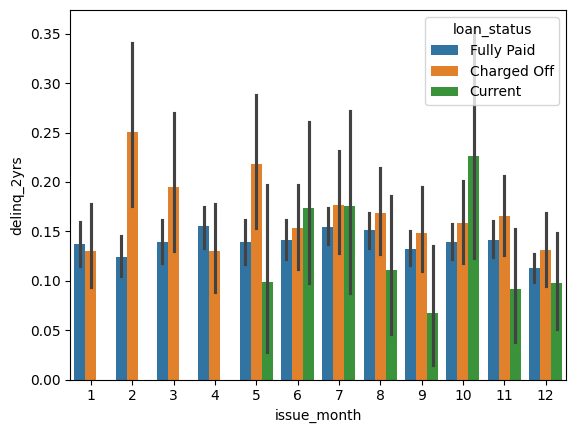

In [55]:
sns.barplot(data=loan_data,x='issue_month',y='delinq_2yrs',hue='loan_status',estimator="mean")

##### **Observation:** It is observed that number of Charged Off loans are high for the loans issued in the month of February,March & May where monthly payments are delayed

### Segmmented Univariate Analysis : issue_month & loan_status
We are trying to analyse if the current status of loan is related to issued month

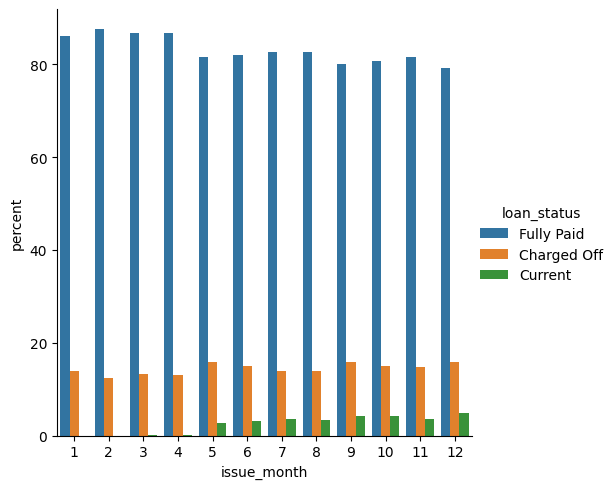

In [56]:
loan_data.groupby('issue_month')['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x='issue_month',y='percent',hue='loan_status',kind='bar')

##### **Observation:** It is observed that overall February month has the least number of Charged Off loans

### Segmented Univariate Analysis : home_ownership & loan_status
We are trying to analyse if the current status of loan is related to ownership of home of the borrower

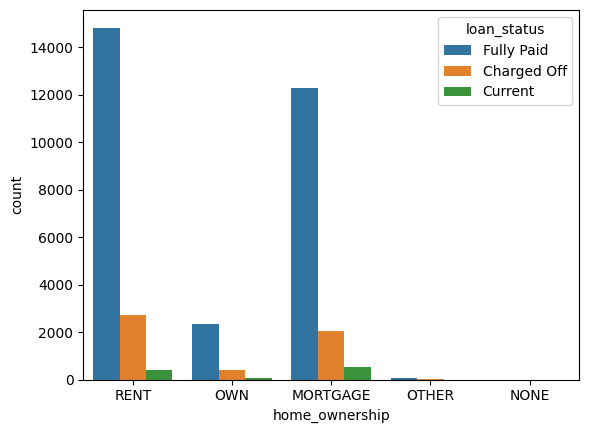

In [57]:
sns.countplot(data=loan_data,x='home_ownership',hue='loan_status')
plt.show()

##### **Observation:** It is observed that mostly loans are applied by the borrowers who are with home ownership of Rent & Mortgage, but there is no useful pattern of Charged Off loans in terms of home ownership

### Univariate Analysis : purpose
We are analysing the purpose of the loan

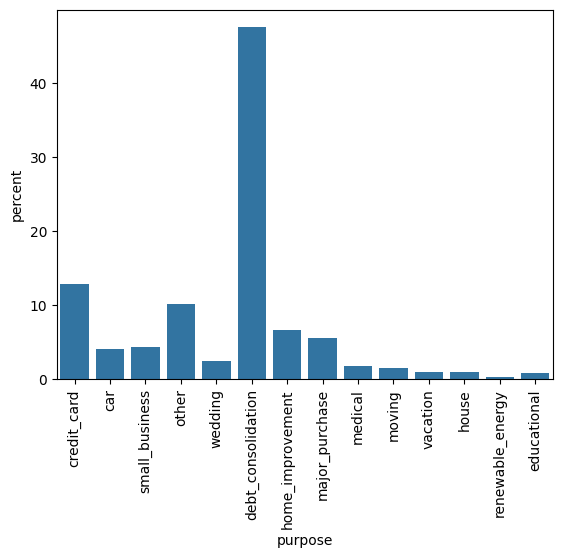

In [58]:
graph=sns.countplot(x=loan_data['purpose'],stat='percent')
plt.setp(graph.get_xticklabels(), rotation=90) 
plt.show()

##### **Observation:** It is observed that almost half of the loans are applied for the purpose of debt consolidation

### Segmented Univariate Analysis : loan_status & purpose
We are trying to analyse if the current status of loan is related to the purpose of applying loan

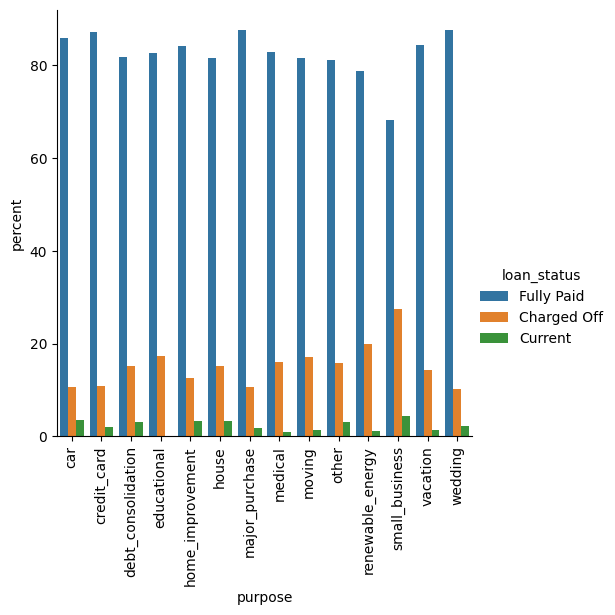

In [59]:
graph = loan_data.groupby('purpose')['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x='purpose',y='percent',hue='loan_status',kind='bar')
for ax in graph.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=90) 

##### **Observation:** It is observed that in average most loans applied for small_business purpose are having high Charge Offs

### Segmented Univariate Analysis : open_acc & loan_status
We are trying to analyse if the current status of loan is related to number of open credit accounts

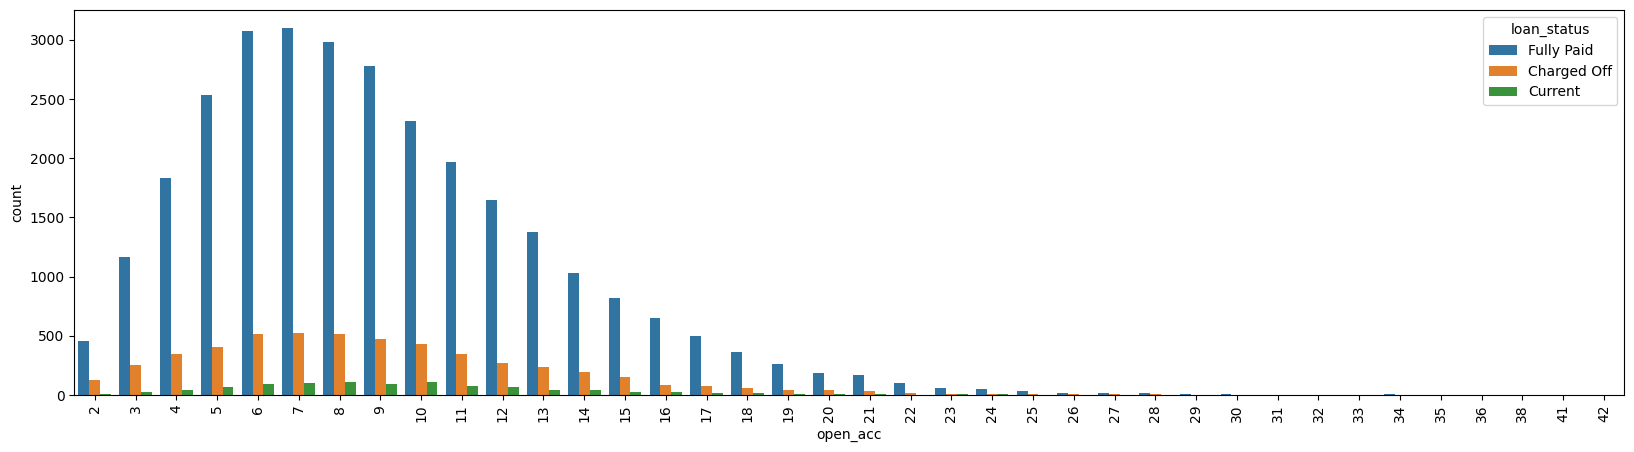

In [60]:
graph = sns.countplot(data=loan_data,x='open_acc',hue='loan_status')
plt.gcf().set_size_inches(20, 5)
plt.setp(graph.get_xticklabels(), rotation=90)
plt.show()

##### **Observation:** It is observed that most number of loans are applied by the borrowers who are having 2-15 open credit accounts

### Bivariate Analysis : loan_status & annual_inc
We are trying to analyse if the current status of loan is related to annual income of the borrower

<Axes: xlabel='loan_status', ylabel='annual_inc'>

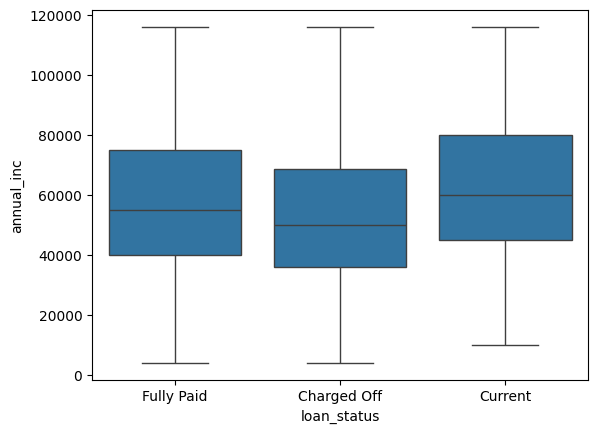

In [61]:
sns.boxplot(data=loan_data,x='loan_status',y='annual_inc')

##### **Observation:** It is observed that Charged Off loans are belonging to the borrowers whose annual income is lower

### Segmented Univariate Analysis : addr_state & loan_status
We are trying to analyse if the current status of loan is related to the borrower's address state

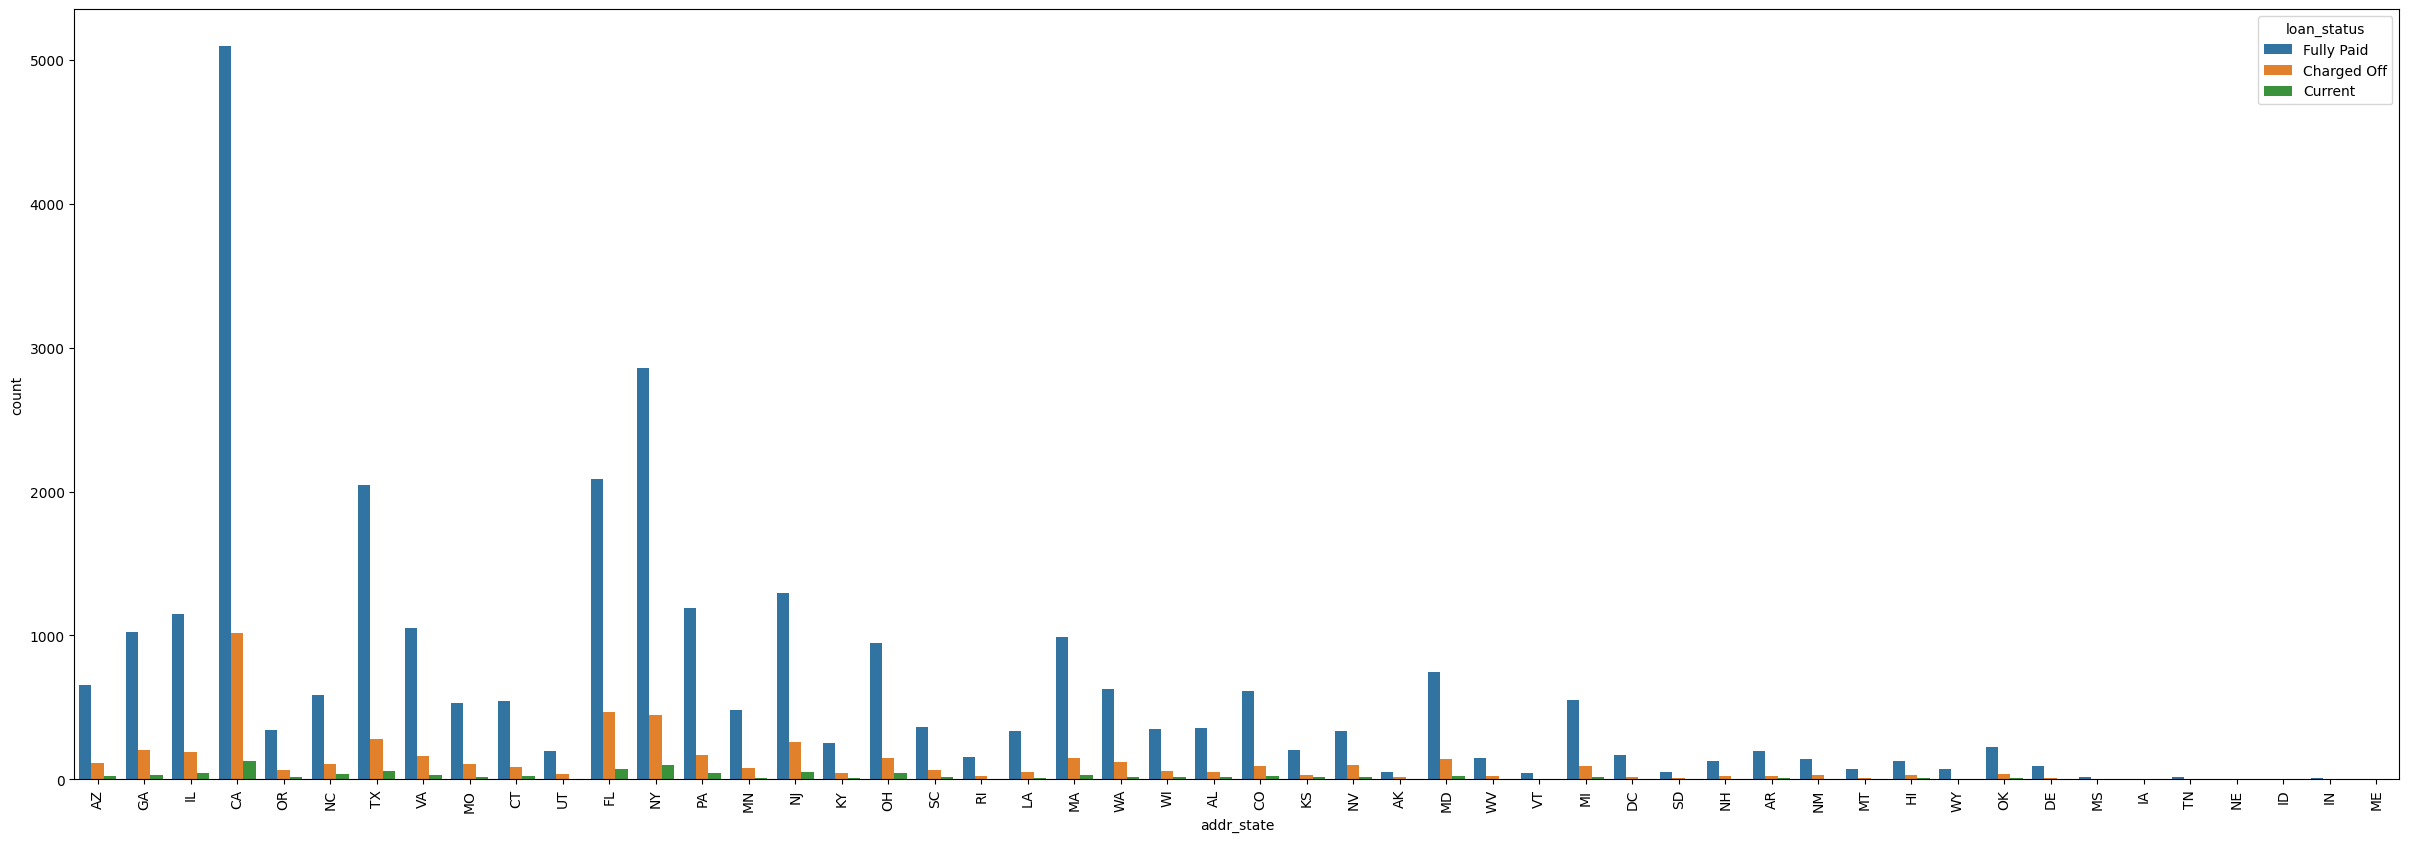

In [62]:
graph = sns.countplot(data=loan_data,x='addr_state',hue='loan_status')
plt.gcf().set_size_inches(30, 10)
plt.setp(graph.get_xticklabels(), rotation=90)
plt.show()

##### **Observation:** It is observed that most number of loans are applied by the borrowers in CA,FL,NY,TX 

### Bivariate Analysis : inq_last6mths & loan_status
We are trying to analyse if the current status of loan is related to number of inquiries in last 6 months

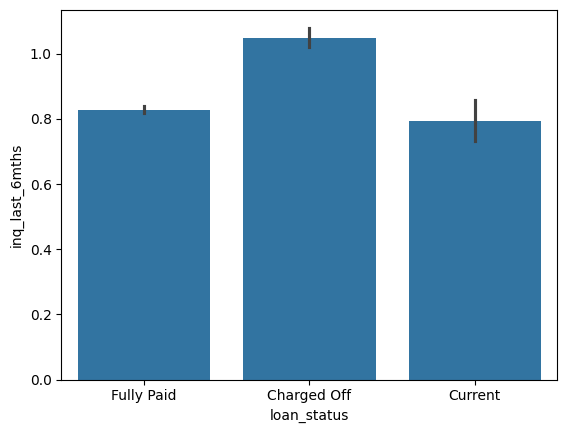

In [63]:
sns.barplot(data=loan_data,x='loan_status',y='inq_last_6mths',estimator="mean")
plt.show()

##### **Observation:** It is observed that when the number of enquiries is high, the chance of the loan being Charged Off is also high

### Bivariate Analysis : dti & loan_status
We are trying to analyse if the current status of loan is related to dti
###### dti = A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income


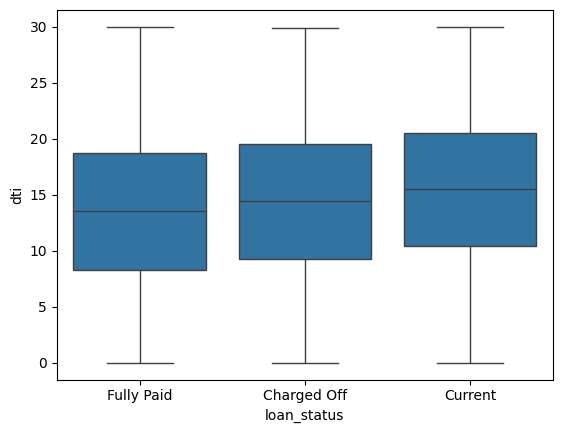

In [64]:
sns.boxplot(data=loan_data,x='loan_status',y='dti')
plt.show()

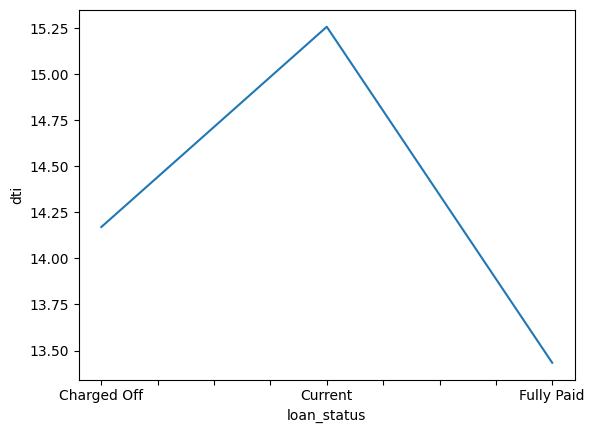

In [65]:
loan_data.groupby(['loan_status'])['dti'].mean().plot()
plt.ylabel('dti')
plt.show()

##### **Observation:** It is observed that in avergae dti is higher for Charged Off loans w.r.t the Fully Paid loans

### Correlation Matrix

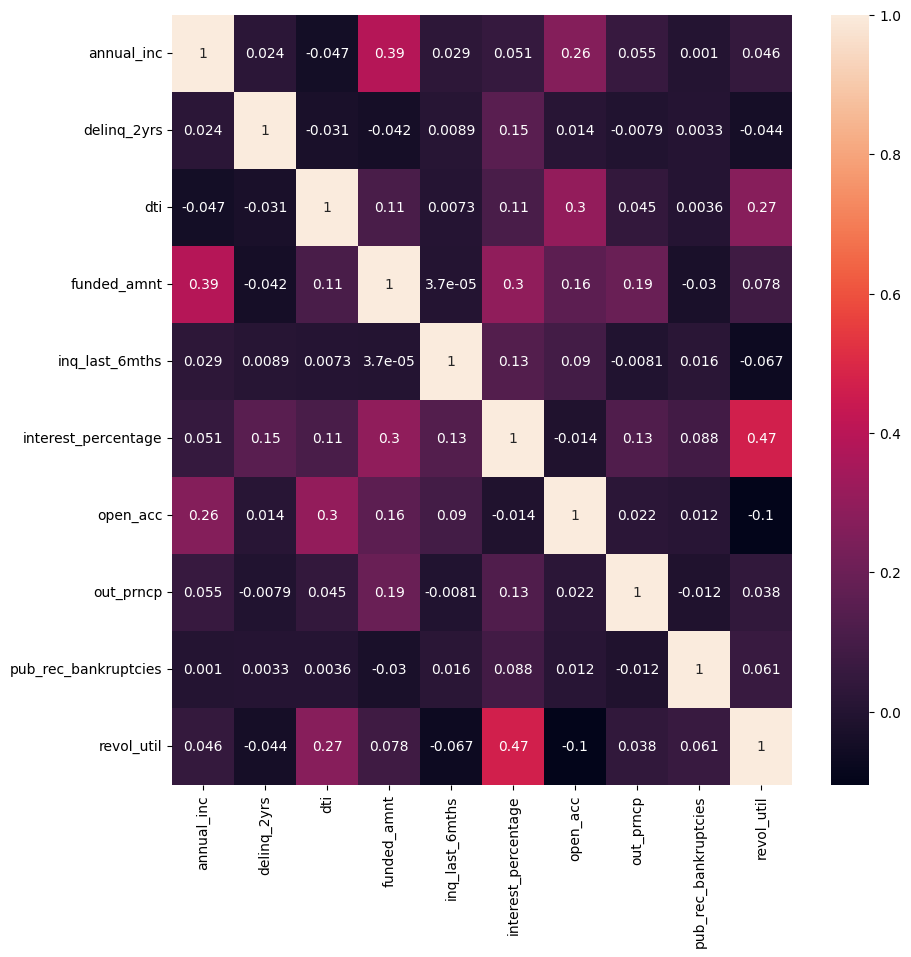

In [66]:
plt.figure(figsize=(10,10))
sns.heatmap(loan_data[["annual_inc","delinq_2yrs","dti","funded_amnt","inq_last_6mths","interest_percentage","open_acc","out_prncp","pub_rec_bankruptcies","revol_util"]].corr(),annot=True)
plt.show()

##### **Observation:** Relatively high positive correlation between revol_util, funded_amnt with interest_percentage

## Conclusion - Driving factors that could lead to loan defaulting

* **Segmented Univariate Analysis -** Loans provided with higher grade and higher term and applied for the purpose of 'Small Business' have high chances of defaulting
* **Bivariate Analysis -** Loans provided to borrower having high revolving utilization or DTI or number of bankruptcies have high chances of defaulting. Also, late monthly credit installment payments and higher number of inquiries lead to high chances of loan defaulting.